In [1]:
#importing libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from scipy.stats import f_oneway

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 1. Write a code to load the dataset and display the first five observations

In [3]:
#load the csv file
#store the data in 'youtube_views'
youtube_views = pd.read_csv("train.csv")

#display first five observations using head()
youtube_views.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.000000,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.000000,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.000000,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.000000,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.000000,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.000000,22,3,257850,TRUE,TRUE,0,0,True,1502102,NaN,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.000000,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.000000,17,5,263939,TRUE,TRUE,0,0,True,3519302,NaN,NaN
4,TWP93KXT70,24,nigahiga,20563106.000000,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.000000,15,7,268085,TRUE,TRUE,0,0,True,4835374,NaN,NaN


### 2. Write a code to remove unique columns from the respective dataframe and display first 10 observations

 

In [4]:
#removing all unique columns with the help of drop function.
youtube_views.drop(['Video_id', 'channel_title', 'title', 'tags','description' , 'Unnamed: 17','Unnamed: 18'], axis = 1, inplace = True)

#displaying first 10 observation
youtube_views.head(10)

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,9086142.000000,6.000000,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,24,5937292.000000,1.000000,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,23,4191209.000000,10.000000,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,24,13186408.000000,12.000000,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,24,20563106.000000,11.000000,15,7,268085,TRUE,TRUE,0,0,True,4835374
5,28,4652602.000000,10.000000,9,1,198248,TRUE,FALSE,8619,3697,True,1580238
6,24,5292034.000000,4.000000,17,5,,FALSE,FALSE,9951,937,False,1204461
7,28,10474796.000000,9.000000,14,7,103280,TRUE,FALSE,18010,11026,True,2542878
8,1,2453494.000000,8.000000,20,1,214583,TRUE,FALSE,12126,7855,True,1090597
9,25,3808198.000000,11.000000,8,2,223434,TRUE,TRUE,0,0,True,1407313


### 3. Write a python code to check the dimension of data.




In [5]:
youtube_views.shape

(3198, 12)

### 4. Check the summary of the data



In [6]:
youtube_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_id            3192 non-null   object 
 1   subscriber             3175 non-null   float64
 2   Trend_day_count        3197 non-null   float64
 3   Tag_count              3197 non-null   object 
 4   Trend_tag_count        3197 non-null   object 
 5   comment_count          3198 non-null   object 
 6   comment_disabled       3198 non-null   object 
 7   like dislike disabled  3198 non-null   object 
 8   likes                  3198 non-null   object 
 9   dislike                3198 non-null   object 
 10  tag appered in title   3197 non-null   object 
 11  views                  3198 non-null   object 
dtypes: float64(2), object(10)
memory usage: 299.9+ KB


In [7]:
youtube_views=youtube_views.dropna()
youtube_views

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,9086142.000000,6.000000,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,24,5937292.000000,1.000000,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,23,4191209.000000,10.000000,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,24,13186408.000000,12.000000,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,24,20563106.000000,11.000000,15,7,268085,TRUE,TRUE,0,0,True,4835374
5,28,4652602.000000,10.000000,9,1,198248,TRUE,FALSE,8619,3697,True,1580238
6,24,5292034.000000,4.000000,17,5,,FALSE,FALSE,9951,937,False,1204461
7,28,10474796.000000,9.000000,14,7,103280,TRUE,FALSE,18010,11026,True,2542878
8,1,2453494.000000,8.000000,20,1,214583,TRUE,FALSE,12126,7855,True,1090597
9,25,3808198.000000,11.000000,8,2,223434,TRUE,TRUE,0,0,True,1407313


In [8]:
youtube_views = youtube_views.astype({'views':int,'likes':int,'dislike':int})
youtube_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3165 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_id            3165 non-null   object 
 1   subscriber             3165 non-null   float64
 2   Trend_day_count        3165 non-null   float64
 3   Tag_count              3165 non-null   object 
 4   Trend_tag_count        3165 non-null   object 
 5   comment_count          3165 non-null   object 
 6   comment_disabled       3165 non-null   object 
 7   like dislike disabled  3165 non-null   object 
 8   likes                  3165 non-null   int32  
 9   dislike                3165 non-null   int32  
 10  tag appered in title   3165 non-null   object 
 11  views                  3165 non-null   int32  
dtypes: float64(2), int32(3), object(7)
memory usage: 284.4+ KB


### 5. Write a  code to check which varibales are numeric in the respective dataframe



In [9]:
#storing all the numeric data in 'df_numeric_features'
#select_dtypes() selects the datatype 
df_numeric_features = youtube_views.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features.head()

,subscriber,Trend_day_count,likes,dislike,views
0,9086142.000000,6.000000,13342,6089,1978978
1,5937292.000000,1.000000,5761,3044,1487870
2,4191209.000000,10.000000,0,0,1502102
3,13186408.000000,12.000000,0,0,3519302
4,20563106.000000,11.000000,0,0,4835374


### 6. Write a  code to check which varibales are categorical in the respective dataframe


In [34]:

categorical_columns = youtube_views.select_dtypes(include=['category', 'object'])

# List of categorical column names
categorical_column_names = categorical_columns.columns.tolist()

# Print the categorical column names
print("Categorical Variables:")
for column_name in categorical_column_names:
    print(column_name)


Categorical Variables:
category_id
comment_disabled
like dislike disabled
tag appered in title


### 7. Write a function to convert following columns 'Tag_count', 'likes', 'dislike', 'views', 'comment_count', 'Trend_tag_count' to numeric.

In [11]:
#creating a function 'imputeTrainNull'
#pd.to_numeric converts respective column to numeric data

def imputeTrainNull(data):    
    data.Trend_day_count = pd.to_numeric(data.Trend_day_count, errors='coerce')
    data.Tag_count = pd.to_numeric(data.Tag_count, errors='coerce')
    data.likes = pd.to_numeric(data.likes, errors='coerce')
    data.dislike = pd.to_numeric(data.dislike, errors='coerce')
    data.views = pd.to_numeric(data.views, errors='coerce')
    data.comment_count = pd.to_numeric(data.comment_count, errors='coerce')
    data.Trend_tag_count = pd.to_numeric(data.Trend_tag_count, errors='coerce')
    print(data.isnull().sum())

#passing the youtube_views to respective function    
#calling function    
imputeTrainNull(youtube_views)

category_id                 0
subscriber                  0
Trend_day_count             0
Tag_count                   0
Trend_tag_count             1
comment_count            1008
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        0
views                       0
dtype: int64


### 8. Check the new count of numeric variables




In [12]:
#storing all the numeric data in 'df_numeric_features'
#select_dtypes() selects the datatype 
#checking the new count after conversion

df_numeric_features =  youtube_views.select_dtypes(include=[np.number])

df_numeric_features.head()
#df_categorical_features



,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
0,9086142.000000,6.000000,21,6.000000,NaN,13342,6089,1978978
1,5937292.000000,1.000000,23,1.000000,116266.000000,5761,3044,1487870
2,4191209.000000,10.000000,22,3.000000,257850.000000,0,0,1502102
3,13186408.000000,12.000000,17,5.000000,263939.000000,0,0,3519302
4,20563106.000000,11.000000,15,7.000000,268085.000000,0,0,4835374


### 9. Check the new count of categorical variables




In [36]:

categorical_columns = youtube_views.select_dtypes(include=['category', 'object'])

# List of categorical column names
categorical_column_names = categorical_columns.columns.tolist()

# Print the count of categorical variables
print("Count of Categorical Variables:", len(categorical_column_names))


Count of Categorical Variables: 4


### 10. With the help of boxplot see which variables have highest outliers. Title should be 'Boxplot of numeric varibales'




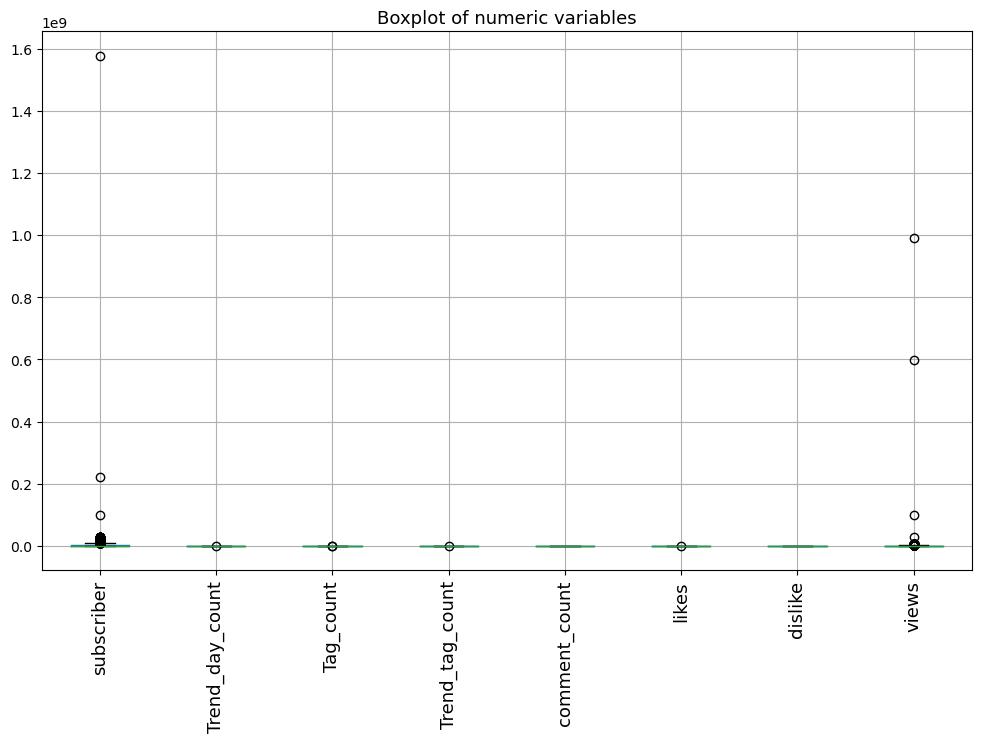

In [14]:
#set the plot size using figure() 
plt.figure(figsize = (12,7))

# plot a boxplot to visualize the outliers
df_numeric_features.boxplot()

#set the title
plt.title('Boxplot of numeric variables', fontsize = 13)

# xticks(ticks) gives the x-axis tick values
plt.xticks(rotation = 'vertical', fontsize = 13)

# display the plot
plt.show()

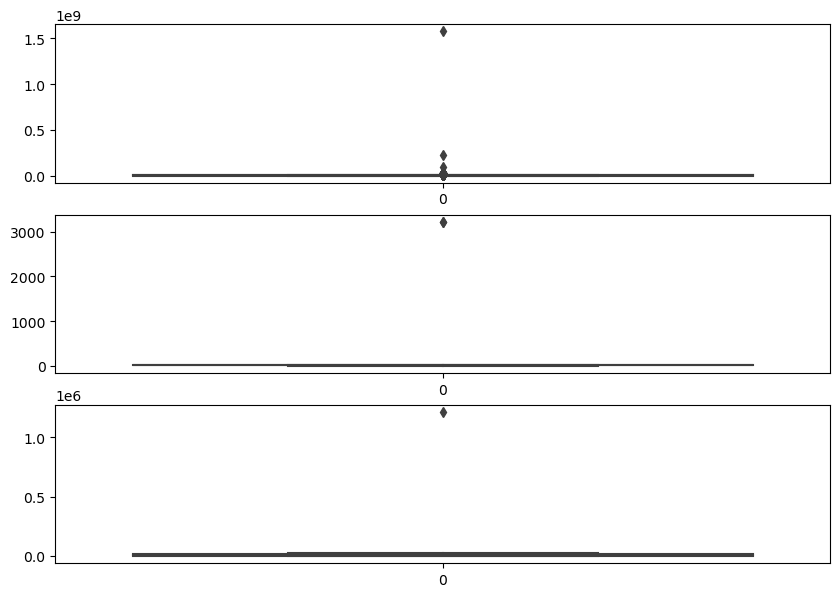

In [15]:
fig, axs = plt.subplots(3,1, figsize=(10,7))
plt1=sns.boxplot(youtube_views['subscriber'], ax =axs[0])
plt2=sns.boxplot(youtube_views['Tag_count'], ax =axs[1])
plt3=sns.boxplot(youtube_views['likes'], ax =axs[2])

plt.show()


### 11. Write a function to replace NA values with preceding values for following column 'comment_disabled', 'like dislike disabled', 'category_id', 'tag appered in title'

In [16]:
#creating a function 'imputepreceding_values' to fill with na values
#fillna method fills all the missing values with preceding value
def imputepreceding_values(data):
    
    data.comment_disabled.fillna(method ='ffill', inplace=True)
    data['like dislike disabled'].fillna(method ='ffill', inplace=True)
    data.category_id.fillna(method ='ffill', inplace=True)
    data['tag appered in title'].fillna(method ='ffill', inplace=True)
    print(data.isnull().sum())
    
#calling a function
#passing the dataset (youtube_views)
imputepreceding_values(youtube_views)
## not used regular

category_id                 0
subscriber                  0
Trend_day_count             0
Tag_count                   0
Trend_tag_count             1
comment_count            1008
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        0
views                       0
dtype: int64


### 12. Write a function to replace NA values with median for following column 'Trend_day_count', 'Tag_count', 'Trend_tag_count', 'comment_count', 'likes', 'dislike', 'views', 'subscriber'


In [17]:
#creating a function 'impute_median_values'
#fillna method fills all the missing values with preceding value

def impute_median_values(data):
    data.Trend_day_count.fillna(data.Trend_day_count.median(), inplace=True)
    data.Tag_count.fillna(data.Tag_count.median(), inplace=True)
    data.Trend_tag_count.fillna(data.Trend_tag_count.median(), inplace=True)
    data.comment_count.fillna(data.comment_count.median(), inplace=True)
    data.likes.fillna(data.likes.median(), inplace=True)
    data.dislike.fillna(data.dislike.median(), inplace=True)
    data.views.fillna(data.views.median(), inplace=True)
    data.subscriber.fillna(data.subscriber.median(), inplace=True) 
    print(data.isnull().sum())

#calling a 'function
impute_median_values(youtube_views)

category_id              0
subscriber               0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64


### 13. Write a function to treat ouliers (use z-score) also check the skewness of the data

In [18]:
def handleOutliers(data):
     #include all numeric data
    df_num = data.select_dtypes(include=['int64','float64' ])
    
    # #calculating z-score by passing all numeric varibale
    z = np.abs(stats.zscore(df_num))
    
    #threshold = 3
    x= np.where(z > 3)
    
    #droping the variables 
    data.drop(data.index[x[:1]], inplace=True)
    
    #printing the skewness of each variable
    print(df_num.skew())
    

#calling the function
handleOutliers(youtube_views)

subscriber        52.163184
Trend_day_count   56.097099
Tag_count         39.512930
Trend_tag_count   56.247600
comment_count     -0.000060
dtype: float64


### 14. Write a code to reset all the new values that are changed by outliers

In [19]:
#reset_index allows you to reset all the values
youtube_views = youtube_views.reset_index(drop = True)

### 15. Use cube root tranformation to treat skewness of columns 'views' and 'subscriber' and again check the skewness

In [20]:
youtube_views.views = ((youtube_views.views) ** (1/3))
youtube_views.subscriber = ((youtube_views.subscriber) ** (1/3))

In [21]:
youtube_views.skew()

subscriber              0.426953
Trend_day_count        -0.036370
Tag_count              -0.017400
Trend_tag_count        -0.008593
comment_count          -0.000112
likes                  48.356682
dislike                 0.238440
tag appered in title   -0.681392
views                   8.885899
dtype: float64

### 16. Write a python code to detect missing values and store it in 'Total' variable and display it in descending order

In [22]:
#isnull().sum() returns the number of missing values in each variable
#ascending = False sorts values in the descending order
Total = youtube_views.isnull().sum().sort_values(ascending=False) 
Total

category_id              0
subscriber               0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64

### 17. Display the missing values in the form of percentage in descending manner

In [23]:
#ascending = False sorts the values in the descending order
Percentage = (youtube_views.isnull().sum()*100/youtube_views.isnull().count()).sort_values(ascending=False)   

#concat the 'Total' and 'Percentage' columns using concat()
missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
category_id,0,0.000000
subscriber,0,0.000000
Trend_day_count,0,0.000000
Tag_count,0,0.000000
Trend_tag_count,0,0.000000
comment_count,0,0.000000
comment_disabled,0,0.000000
like dislike disabled,0,0.000000
likes,0,0.000000
dislike,0,0.000000


### 18. Write a code to convert following columns 'tag appered in title' and 'category_id' into 'object' data type 

In [24]:
#convert 'tag appered in title' into datatype object
youtube_views['tag appered in title'] = youtube_views['tag appered in title'].astype('object')

#convert 'category_id' into datatype object
youtube_views['category_id'] = youtube_views['category_id'].astype('object')

### 19. Write a code to convert following columns 'comment_disabled' and 'like dislike disabled' into 'string' data type 

In [25]:
#convert 'comment_disabled' into datatype string
youtube_views['comment_disabled'] = youtube_views['comment_disabled'].astype('str')

#convert 'like dislike disable' into datatype string
youtube_views['like dislike disabled'] = youtube_views['like dislike disabled'].astype('str')


### 20. Write a code to convert following columns 'comment_disabled' and 'like dislike disabled' into lower case

In [26]:
#Converting comment_disabled into lowercase
youtube_views.comment_disabled = youtube_views.comment_disabled.str.lower()

#Converting like dislike disabled into lowercase
youtube_views['like dislike disabled'] = youtube_views['like dislike disabled'].str.lower() 

### 21. Extract all the numeric variables and store those variables in 'df_numeric_features' and display first five observation

In [27]:
# filter the numerical features in the dataset
df_numeric_features = youtube_views.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features.head()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
0,208.669915,6.000000,21,6.000000,163785.000000,13342,6089,125.549115
1,181.076797,1.000000,23,1.000000,116266.000000,5761,3044,114.162025
2,161.230217,10.000000,22,3.000000,257850.000000,0,0,114.524870
3,236.252005,12.000000,17,5.000000,263939.000000,0,0,152.108043
4,273.965728,11.000000,15,7.000000,268085.000000,0,0,169.099902


### 22. Extract all the categorical variables and see the change

In [33]:

# Select only the categorical columns (columns with data type 'object' or 'category')
categorical_columns = youtube_views.select_dtypes(include=['object', 'category'])

# Display the list of categorical columns
print("Categorical Columns:")
print(categorical_columns.columns.tolist())

# Show unique values for each categorical column
for column in categorical_columns.columns:
    unique_values = categorical_columns[column].unique()
    print(f"Unique values in {column}:", unique_values)

# Summarize categorical column statistics
categorical_summary = categorical_columns.describe()
print("\nCategorical Column Summary:")
print(categorical_summary)


Categorical Columns:
['category_id', 'comment_disabled', 'like dislike disabled', 'tag appered in title']
Unique values in category_id: ['22' '24' '23' '28' '1' '25' '17' '15' '27' '26' '2' '10' '19' '20' '29'
 '“24' '43']
Unique values in comment_disabled: ['false' 'true']
Unique values in like dislike disabled: ['false' 'true']
Unique values in tag appered in title: [False True]

Categorical Column Summary:
       category_id comment_disabled like dislike disabled tag appered in title
count         3158             3158                  3158                 3158
unique          17                2                     2                    2
top             24             true                 false                 True
freq           777             2152                  2332                 2088


### 23. Write a python program to plot heatmap to check correlation between independent variables

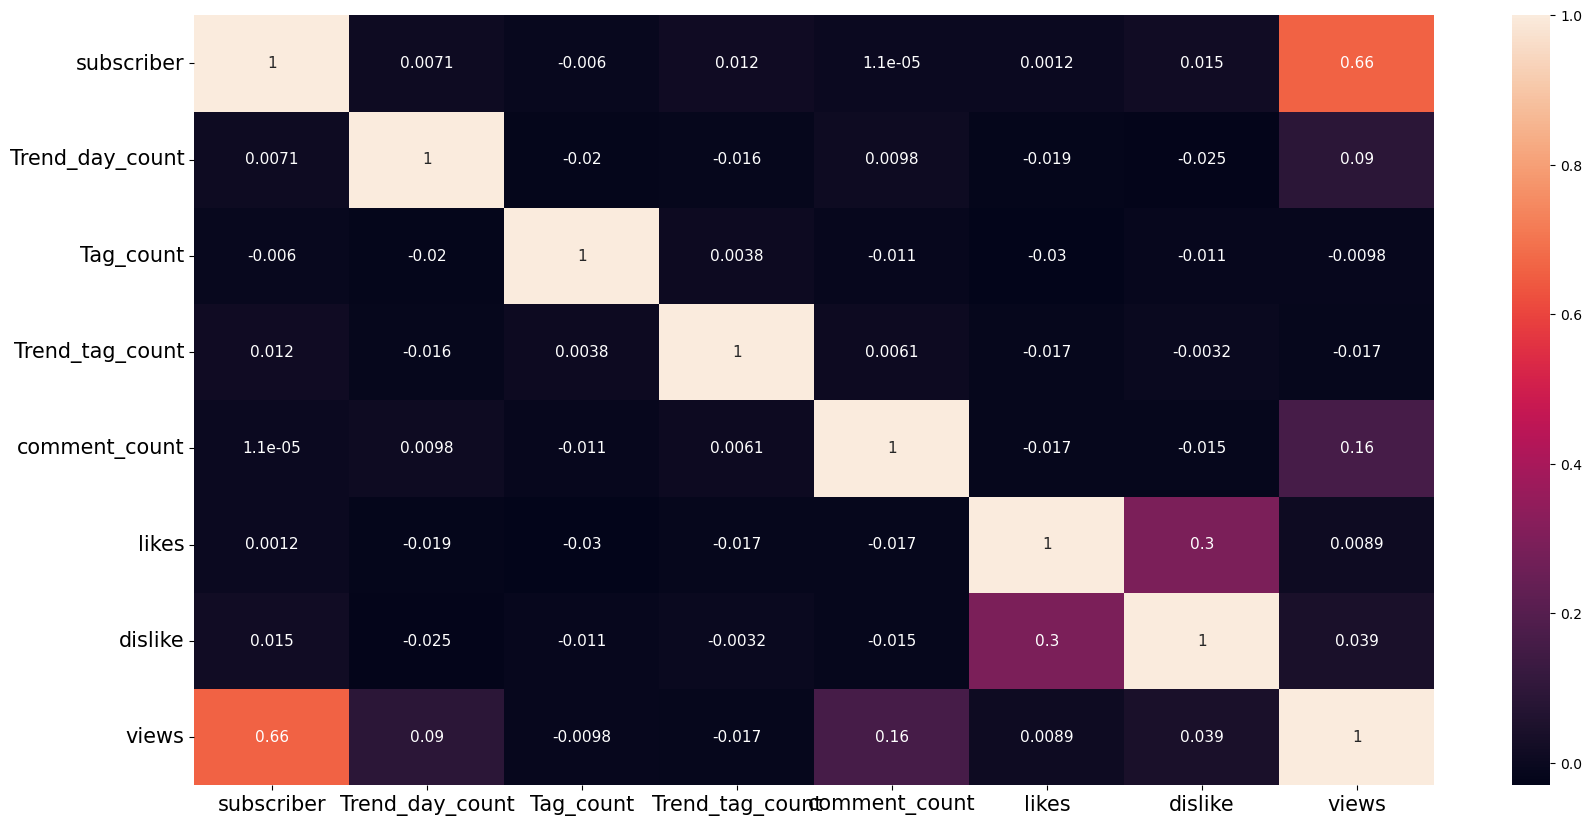

In [29]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
sns.heatmap(df_numeric_features.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

### 24. Plot a  heatmap to identify the variables with a correlation greater than 0.6 and less than -0.6

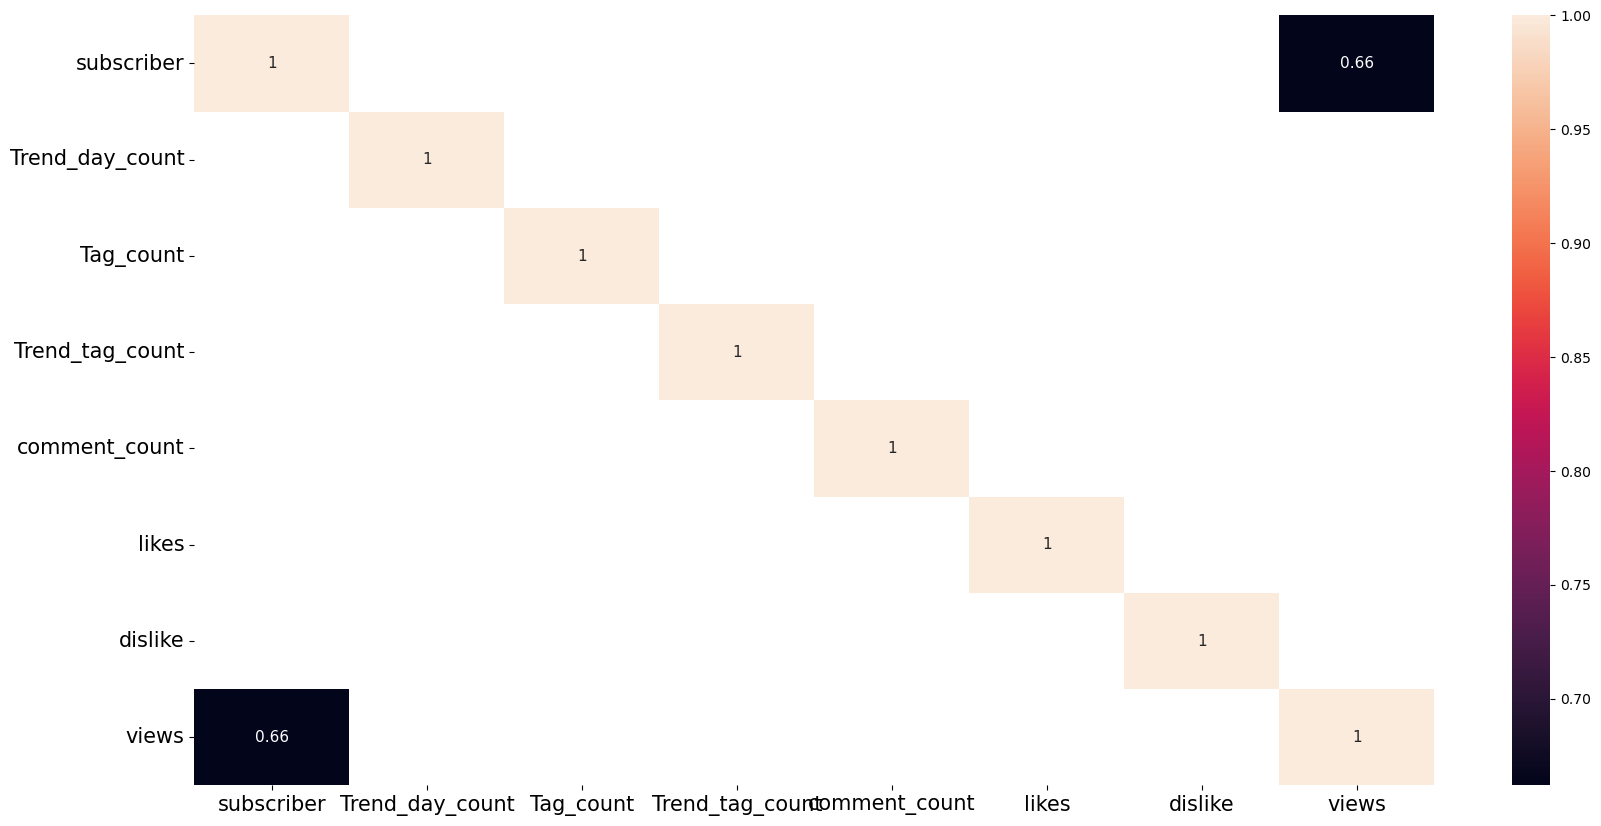

In [30]:
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix

sns.heatmap(df_numeric_features.corr()[np.abs(youtube_views.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()